### Assignment 3 - Background & Data (Wrangling)

#### Predicting Hepatitis B with Machine Learning Using NHANES (2017) - Group 8

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from functools import reduce

###### Variables
- Hepatitis B (hepatitisB)
- Complete Blood Count (cbc)
- Sexual Behavior (sexualbh)
- Alcohol Use (alcoholuse)
- Income (income)
- Occupation (occupation)
- Medical Conditions (medcond)

In [50]:
hepatitisB_20152016 = pd.read_sas('HEPB_S_I.XPT')
cbc_20152016 = pd.read_sas('CBC_I.XPT')
sexualbh_20152016 = pd.read_sas('SXQ_I.XPT')
alcoholuse_20152016 = pd.read_sas('ALQ_I.XPT')
income_20152016 = pd.read_sas('INQ_I.XPT')
occupation_20152016 = pd.read_sas('OCQ_I.XPT')
medcondition_20152016 = pd.read_sas('MCQ_I.XPT')

In [63]:
hepatitisB_20132014 = pd.read_sas('HEPB_S_H.XPT')
cbc_20132014 = pd.read_sas('CBC_H.XPT')
sexualbh_20132014 = pd.read_sas('SXQ_H.XPT')
alcoholuse_20132014 = pd.read_sas('ALQ_H.XPT')
income_20132014 = pd.read_sas('INQ_H.XPT')
occupation_20132014 = pd.read_sas('OCQ_H.XPT')
medcondition_20132014 = pd.read_sas('MCQ_H.XPT')

In [51]:
hepatitisB_20152016

,SEQN,LBXHBS
0,83732.0,2.0
1,83733.0,2.0
2,83734.0,2.0
3,83735.0,2.0
4,83736.0,1.0
...,...,...
8882,93698.0,1.0
8883,93699.0,1.0
8884,93700.0,1.0
8885,93701.0,1.0


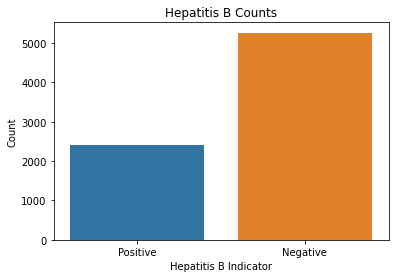

In [105]:
ax = sns.countplot(x = 'LBXHBS', data = hepatitisB_20152016)
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_title('Hepatitis B Counts')
ax.set_xlabel('Hepatitis B Indicator')
ax.set_ylabel('Count')
plt.show()

In [55]:
hepatitisB_20132014

,SEQN,LBXHBS
0,73557.0,1.0
1,73558.0,2.0
2,73559.0,2.0
3,73560.0,2.0
4,73561.0,2.0
...,...,...
9170,83727.0,2.0
9171,83728.0,1.0
9172,83729.0,2.0
9173,83730.0,2.0


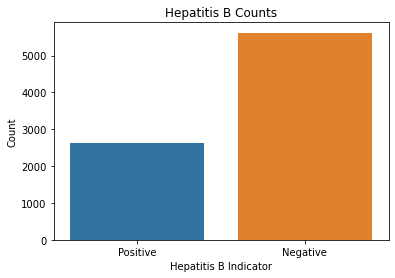

In [106]:
ax = sns.countplot(x = 'LBXHBS', data = hepatitisB_20132014)
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_title('Hepatitis B Counts')
ax.set_xlabel('Hepatitis B Indicator')
ax.set_ylabel('Count')
plt.show()

##### Merging Datasets

In [58]:
merg_20152016 = reduce(lambda left, right: 
             pd.merge(left, right, on = ["SEQN"]), 
              [hepatitisB_20152016, cbc_20152016, sexualbh_20152016, alcoholuse_20152016,
              income_20152016, occupation_20152016, medcondition_20152016])

In [67]:
merg_20152016

,SEQN,LBXHBS,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,...,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,OSQ230
0,83732.0,2.0,9.8,23.9,8.2,63.5,4.0,0.5,2.3,0.8,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
1,83733.0,2.0,7.3,31.3,9.7,54.8,2.6,1.8,2.3,0.7,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,83735.0,2.0,6.1,17.1,10.3,68.7,3.1,0.9,1.0,0.6,...,9.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0
3,83736.0,1.0,4.2,47.1,7.8,44.8,0.2,0.2,2.0,0.3,...,9.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,83741.0,2.0,3.5,38.2,10.6,39.7,10.3,1.3,1.3,0.4,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,93690.0,2.0,11.8,15.6,8.1,74.9,0.7,0.8,1.8,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,NaN
4839,93691.0,2.0,7.1,24.2,8.9,65.5,0.9,0.6,1.7,0.6,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
4840,93696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,NaN
4841,93700.0,1.0,7.6,26.4,9.2,61.9,2.0,0.6,2.0,0.7,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN


In [64]:
merg_20132014 = reduce(lambda left, right: 
             pd.merge(left, right, on = ["SEQN"]), 
              [hepatitisB_20132014, cbc_20132014, sexualbh_20132014, alcoholuse_20132014,
              income_20132014, occupation_20132014, medcondition_20132014])

In [68]:
merg_20132014

,SEQN,LBXHBS,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,...,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,MCQ380
0,73557.0,1.0,4.7,42.2,11.0,42.3,3.4,1.2,2.0,0.5,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
1,73558.0,2.0,12.6,27.3,7.6,58.4,6.1,0.6,3.4,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
2,73562.0,2.0,9.4,17.4,6.6,69.2,5.9,0.9,1.6,0.6,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,73564.0,2.0,5.2,30.2,5.9,58.3,5.1,0.6,1.6,0.3,...,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
4,73566.0,2.0,9.5,31.3,7.7,57.5,3.3,0.3,3.0,0.7,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,83721.0,2.0,6.8,20.7,9.1,64.6,4.7,1.0,1.4,0.6,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
5053,83723.0,2.0,7.7,37.6,9.9,50.5,1.6,0.4,2.9,0.8,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5054,83726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN
5055,83727.0,2.0,5.1,31.9,6.4,57.2,3.8,0.6,1.6,0.3,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN


In [71]:
# Merges 2015-2016 data below 2013-2014 data to make one large dataset
full_data = pd.concat([merg_20132014, merg_20152016], ignore_index = True)

In [72]:
full_data

,SEQN,LBXHBS,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,...,SXQ296,INQ300,IND310,INQ320,OCQ600,OCQ610,OCQ630,OCQ640,OCQ660,OSQ230
0,73557.0,1.0,4.7,42.2,11.0,42.3,3.4,1.2,2.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558.0,2.0,12.6,27.3,7.6,58.4,6.1,0.6,3.4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73562.0,2.0,9.4,17.4,6.6,69.2,5.9,0.9,1.6,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73564.0,2.0,5.2,30.2,5.9,58.3,5.1,0.6,1.6,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73566.0,2.0,9.5,31.3,7.7,57.5,3.3,0.3,3.0,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,93690.0,2.0,11.8,15.6,8.1,74.9,0.7,0.8,1.8,1.0,...,2.0,2.0,1.0,1.0,1.0,1.000000e+00,2.0,2.000000e+00,2.0,NaN
9896,93691.0,2.0,7.1,24.2,8.9,65.5,0.9,0.6,1.7,0.6,...,2.0,2.0,1.0,1.0,5.0,5.397605e-79,NaN,5.397605e-79,NaN,NaN
9897,93696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,1.0,1.0,4.0,1.200000e+01,1.0,5.397605e-79,NaN,NaN
9898,93700.0,1.0,7.6,26.4,9.2,61.9,2.0,0.6,2.0,0.7,...,NaN,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# Dataset with columns we have selected
complete_data = full_data[['SEQN', 'LBXHBS', 'ALQ130', 'IND235', 'OCQ260', 'SXD021', 'SXQ645',
            'SXQ610', 'SXQ251', 'MCQ092', 'MCQ160L', 'LBXWBCSI']]

In [126]:
# Percentage of missing values in each feature
percent_nulls = complete_data.isnull().mean() * 100
percent_nulls.sort_values(ascending = False)

SXQ645      56.505051
SXQ251      42.949495
SXQ610      40.949495
ALQ130      37.575758
OCQ260      35.484848
SXD021      11.373737
LBXHBS       6.252525
MCQ160L      6.030303
LBXWBCSI     4.656566
IND235       4.474747
SEQN         0.000000
MCQ092       0.000000
dtype: float64

In [127]:
# Here I have dropped all the rows with NULL

dropna_dataset = complete_data.dropna()

In [128]:
# After doing so still have 2334 instances
# Should be enough to split into 20-test, 80-training

dropna_dataset.shape

(2334, 12)

In [131]:
# Looking at correlations - which are terriable
# target variable is LBXHBS

dropna_dataset.corr()

,SEQN,LBXHBS,ALQ130,IND235,OCQ260,SXD021,SXQ645,SXQ610,SXQ251,MCQ092,MCQ160L,LBXWBCSI
SEQN,1.000000,0.020494,-0.032149,0.024429,0.093183,NaN,-0.023484,0.008237,0.002021,0.052738,-0.009767,-0.007400
LBXHBS,0.020494,1.000000,0.019812,-0.018176,0.005587,NaN,0.017083,0.026329,0.014507,0.012431,-0.005339,0.036193
ALQ130,-0.032149,0.019812,1.000000,0.081899,-0.006152,NaN,-0.004494,-0.006595,-0.037214,0.001264,0.003135,0.019017
IND235,0.024429,-0.018176,0.081899,1.000000,-0.012566,NaN,0.022504,-0.014470,-0.019667,0.034000,0.030550,-0.037202
OCQ260,0.093183,0.005587,-0.006152,-0.012566,1.000000,NaN,-0.000778,0.002519,-0.004364,0.004379,-0.003043,-0.014306
SXD021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SXQ645,-0.023484,0.017083,-0.004494,0.022504,-0.000778,NaN,1.000000,0.001171,-0.250882,-0.008620,-0.004589,-0.015922
SXQ610,0.008237,0.026329,-0.006595,-0.014470,0.002519,NaN,0.001171,1.000000,0.020644,0.002492,0.013758,-0.005284
SXQ251,0.002021,0.014507,-0.037214,-0.019667,-0.004364,NaN,-0.250882,0.020644,1.000000,0.022111,0.010315,0.038562
MCQ092,0.052738,0.012431,0.001264,0.034000,0.004379,NaN,-0.008620,0.002492,0.022111,1.000000,0.004962,0.006945


In [129]:
# Finding indexes of missing values within the Hepatitis column
complete_data[complete_data['LBXHBS'].isnull()].index.tolist()

[9,
 12,
 19,
 44,
 49,
 104,
 114,
 130,
 134,
 136,
 184,
 212,
 234,
 249,
 256,
 258,
 264,
 273,
 276,
 328,
 331,
 352,
 391,
 398,
 416,
 471,
 480,
 494,
 537,
 548,
 555,
 664,
 671,
 679,
 701,
 704,
 746,
 767,
 776,
 798,
 859,
 892,
 918,
 952,
 956,
 990,
 1022,
 1047,
 1049,
 1053,
 1071,
 1073,
 1076,
 1080,
 1134,
 1186,
 1192,
 1213,
 1260,
 1282,
 1296,
 1334,
 1357,
 1376,
 1395,
 1436,
 1437,
 1456,
 1460,
 1467,
 1501,
 1535,
 1554,
 1595,
 1631,
 1640,
 1674,
 1708,
 1716,
 1722,
 1729,
 1749,
 1754,
 1761,
 1780,
 1795,
 1798,
 1803,
 1807,
 1832,
 1890,
 1901,
 1905,
 1922,
 1940,
 2001,
 2017,
 2051,
 2054,
 2065,
 2069,
 2075,
 2104,
 2205,
 2211,
 2227,
 2228,
 2265,
 2272,
 2274,
 2322,
 2335,
 2372,
 2415,
 2423,
 2463,
 2504,
 2507,
 2547,
 2549,
 2569,
 2580,
 2586,
 2626,
 2628,
 2691,
 2717,
 2735,
 2779,
 2792,
 2819,
 2877,
 2907,
 2946,
 2950,
 2964,
 3029,
 3076,
 3112,
 3138,
 3191,
 3215,
 3224,
 3229,
 3265,
 3266,
 3304,
 3430,
 3441,
 3464,
 3

In [66]:
# Correlations, nulls and info of full dataset, might use later?
merg_20132014.corr(method = 'pearson')
merg_20152016.corr(method = 'pearson')
merg_20132014.isnull().sum()
merg_20152016.isnull().sum()
merg_20132014.info()
merg_20152016.info()

SEQN           0
LBXHBS       230
LBXWBCSI     201
LBXLYPCT     215
LBXMOPCT     215
            ... 
MCQ370A        0
MCQ370B        0
MCQ370C        0
MCQ370D        0
MCQ380      4140
Length: 200, dtype: int64